In [49]:
from IPython.core.interactiveshell import InteractiveShell
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import DataPreProcessor as DPP

warnings.filterwarnings('ignore')
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
pd.options.display.max_rows


C:\Program Files (x86)\Python\Python39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Program Files (x86)\Python\Python39\lib\site-packages\numpy\.libs\libopenblas.JPIJNSWNNAN3CE6LLI5FWSPHUT2VXMTH.gfortran-win_amd64.dll
C:\Program Files (x86)\Python\Python39\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


# 1. Load data


In [50]:
chotot_df = pd.read_csv("chotot_cleaned.csv")


In [51]:
alonhadat_df = pd.read_csv("alonhadat.csv")


In [52]:
chotot_df.drop(columns=['address', 'type_real_estate'], inplace=True)
chotot_df.rename(columns={'ahl_type': 'type_real_estate'}, inplace=True)
chotot_df['website'] = 'Chotot'
chotot_df['front_road'] = np.nan
chotot_df.head(3)


,list_time,ward,area,region,property_status,direction,balconydirection,property_legal_document,size (m2),floornumber,furnishing_sell,rooms,toilets,floors,living_size (m2),width (m),length (m),price (million),type_real_estate,website,front_road
0,05/11/2021,Phường Tam Hòa,Thành phố Biên Hòa,Đồng Nai,Đã bàn giao,NaN,NaN,Đang chờ sổ,70.0,NaN,NaN,2,2,Nhiều hơn 10,NaN,NaN,NaN,1150.0,Chung cư,Chotot,NaN
1,05/11/2021,Phường Thống Nhất,Thành phố Biên Hòa,Đồng Nai,Đã bàn giao,Bắc,Nam,Đã có sổ,48.0,NaN,Nội thất đầy đủ,1,1,Nhiều hơn 10,NaN,NaN,NaN,1550.0,Chung cư,Chotot,NaN
2,05/11/2021,Phường Hố Nai,Thành phố Biên Hòa,Đồng Nai,Chưa bàn giao,NaN,NaN,Giấy tờ khác,67.0,NaN,Hoàn thiện cơ bản,2,2,Nhiều hơn 10,NaN,NaN,NaN,360.0,Chung cư,Chotot,NaN


In [53]:
alonhadat_df['website'] = 'alonhadat'
alonhadat_df.head(3)


,city,date,direction,district,floors,front_road,length,price (million),property_legal_document,rooms,size,type_real_estate,ward,width,website
0,Bình Dương,08/11/2021,NaN,Thành phố Thủ Dầu Một,2.0,12.0,12.0,3200.0,NaN,3.0,120.0,Nhà mặt tiền,Phường Hiệp An,6.0,alonhadat
1,Bình Dương,08/11/2021,NaN,Thành phố Thuận An,NaN,10.0,70.0,32000.0,Sổ hồng/ Sổ đỏ,NaN,900.0,Nhà mặt tiền,Phường An Phú,17.0,alonhadat
2,Bình Dương,08/11/2021,NaN,Thành phố Dĩ An,1.0,4.0,12.0,2550.0,Sổ hồng/ Sổ đỏ,3.0,60.0,Nhà trong hẻm,Phường Đông Hòa,5.0,alonhadat


In [54]:
agreement_df = alonhadat_df[alonhadat_df['price (million)'] == "Thỏa thuận"].copy(
)


In [55]:
agreement_df.head()


,city,date,direction,district,floors,front_road,length,price (million),property_legal_document,rooms,size,type_real_estate,ward,width,website
1401,Bình Dương,28/10/2021,NaN,Huyện Bắc Tân Uyên,NaN,10.0,150.0,Thỏa thuận,Sổ hồng/ Sổ đỏ,NaN,15800.0,"Kho, xưởng",Xã Đất Cuốc,100.0,alonhadat
2777,Bình Dương,05/11/2021,Đông Nam,Thành phố Thuận An,NaN,16.0,30.0,Thỏa thuận,Sổ hồng/ Sổ đỏ,NaN,450.0,"Đất nền, liền kề, đất dự án",Phường Thuận Giao,15.0,alonhadat
2964,Bình Dương,06/11/2021,NaN,Thị xã Tân Uyên,NaN,NaN,NaN,Thỏa thuận,NaN,NaN,140000.0,"Kho, xưởng",Phường Khánh Bình,NaN,alonhadat
3758,Bình Dương,07/11/2021,NaN,Thị xã Tân Uyên,NaN,8.0,100.0,Thỏa thuận,Sổ hồng/ Sổ đỏ,NaN,22000.0,"Kho, xưởng",Xã Vĩnh Tân,100.0,alonhadat
3779,Bình Dương,07/11/2021,Tây,Huyện Bắc Tân Uyên,NaN,18.0,130.0,Thỏa thuận,NaN,NaN,15800.0,"Kho, xưởng",Xã Đất Cuốc,120.0,alonhadat


In [56]:
alonhadat_df['price (million)'] = alonhadat_df['price (million)'].apply(
    lambda x: np.nan if x == 'Thỏa thuận' else float(x))

alonhadat_df_ = alonhadat_df.dropna(axis=0, subset=['price (million)'])


# 2. Merge Data


In [57]:
alonhadat_df_.columns


Index(['city', 'date', 'direction', 'district', 'floors', 'front_road',
       'length', 'price (million)', 'property_legal_document', 'rooms', 'size',
       'type_real_estate', 'ward', 'width', 'website'],
      dtype='object')

In [58]:
chotot_df.columns


Index(['list_time', 'ward', 'area', 'region', 'property_status', 'direction',
       'balconydirection', 'property_legal_document', 'size (m2)',
       'floornumber', 'furnishing_sell', 'rooms', 'toilets', 'floors',
       'living_size (m2)', 'width (m)', 'length (m)', 'price (million)',
       'type_real_estate', 'website', 'front_road'],
      dtype='object')

In [59]:
alonhadat_df_.columns.difference(chotot_df.columns)


Index(['city', 'date', 'district', 'length', 'size', 'width'], dtype='object')

In [60]:
alonhadat_df_.rename(columns={"city": "region", "date": "list_time", "size": "size (m2)",
                              'district': "area", 'length': "length (m)", 'width': "width (m)"}, inplace=True)


In [61]:
# merge 2 data lai thanh BDS_df
BDS_df = pd.concat([chotot_df, alonhadat_df_], ignore_index=True)


In [62]:
BDS_df.sample(5)


list_time                 ward              area          region  \
79840   24/07/2021    Phường Phước Bình            Quận 9  Tp Hồ Chí Minh   
85875   30/10/2021     Xã Tân Phú Trung      Huyện Củ Chi  Tp Hồ Chí Minh   
64639   19/10/2021  Phường Tân Thới Hòa      Quận Tân Phú  Tp Hồ Chí Minh   
97606   03/11/2021      Phường Tân Hiệp   Thị xã Tân Uyên      Bình Dương   
101631  29/10/2021        Xã Phước Bình  Huyện Long Thành        Đồng Nai   

       property_status direction balconydirection property_legal_document  \
79840              NaN       Bắc              NaN                     NaN   
85875              NaN       NaN              NaN                Đã có sổ   
64639              NaN       NaN              NaN                Đã có sổ   
97606              NaN   Tây Bắc              NaN                     NaN   
101631             NaN       NaN              NaN          Sổ hồng/ Sổ đỏ   

        size (m2)  floornumber   furnishing_sell rooms toilets floors  \
79840        86.0          NaN               NaN     2       1    NaN   
85875       100.0          NaN               NaN   NaN     NaN    NaN   
64639        87.0          NaN  Nội thất cao cấp     3       2      2   
97606        67.0          NaN               NaN   4.0     NaN    1.0   
101631     2400.0          NaN               NaN   NaN     NaN    NaN   

        living_size (m2)  width (m)  length (m)  price (million)  \
79840                NaN        4.0        23.0           6700.0   
85875                NaN        5.0        20.0            800.0   
64639              170.0        4.0        20.0           5850.0   
97606                NaN        NaN         NaN           1500.0   
101631               NaN       32.0        75.0           7920.0   

                   type_real_estate    website  front_road  
79840                   Nhà mặt phố     Chotot         NaN  
85875                    Đất thổ cư     Chotot         NaN  
64639                       Nhà ngõ     Chotot         NaN  
97606                  Nhà mặt tiền  alonhadat        10.0  
101631  Đất nền, liền kề, đất dự án  alonhadat         5.0

# 3. EDA


## 3.0 Repreprocessing


In [63]:
BDS_df.columns


Index(['list_time', 'ward', 'area', 'region', 'property_status', 'direction',
       'balconydirection', 'property_legal_document', 'size (m2)',
       'floornumber', 'furnishing_sell', 'rooms', 'toilets', 'floors',
       'living_size (m2)', 'width (m)', 'length (m)', 'price (million)',
       'type_real_estate', 'website', 'front_road'],
      dtype='object')

### price


In [64]:
BDS_df['price (million)'].describe()


count    2.208630e+05
mean     7.903109e+06
std      3.707341e+09
min      3.700000e-01
25%      2.750000e+03
50%      5.300000e+03
75%      1.100000e+04
max      1.742304e+12
Name: price (million), dtype: float64

In [17]:
# Thị xã Dĩ An => Thành phố Dĩ An
# Thành phố Biên Hoà => Thành phố Biên Hòa
# Quận Thủ Đức => Thành phố Thủ Đức
BDS_df['area'].replace({'Thị xã Dĩ An': 'Thành phố Dĩ An',
                        'Thành phố Biên Hoà': 'Thành phố Biên Hòa',
                        'Quận Thủ Đức':'Thành phố Thủ Đức'},
                       inplace=True)


In [18]:
BDS_df = BDS_df[BDS_df['area'] != 'Quận Bắc Từ Liêm']

In [19]:
def replace_error_value(x):
    '''
        Kiểm tra và thay thế các giá trị không đúng định dạng trong thuộc tính ward
        Giá trị bắt đầu là "Xã", "Phường", "Thị trấn" là hợp lệ

        Parameters
        ----------
            - x (string): chuỗi giá trị cần kiểm tra

        Returns
        ----------
            - Kết quả sau khi kiểm tra
    '''
    if isinstance(x, (int, float)) or x == np.nan:
        return np.nan

    temp = x.lower()
    if temp.startswith(('xã', 'phường', 'thị trấn')):
        return x

    return np.nan

BDS_df['ward'] = BDS_df['ward'].apply(replace_error_value)

In [20]:
price_mark = BDS_df['price (million)'].quantile(0.99)
price_mark


160000.0

### ward


In [22]:
def replace_error_value(x):
    '''
        Kiểm tra và thay thế các giá trị không đúng định dạng trong thuộc tính ward
        Giá trị bắt đầu là "Xã", "Phường", "Thị trấn" là hợp lệ

        Parameters
        ----------
            - x (string): chuỗi giá trị cần kiểm tra

        Returns
        ----------
            - Kết quả sau khi kiểm tra
    '''
    if isinstance(x, (int, float)) or x == np.nan:
        return np.nan

    temp = x.lower()
    if temp.startswith(('xã', 'phường', 'thị trấn')):
        return x

    return np.nan


BDS_df['ward'] = BDS_df['ward'].apply(replace_error_value)


In [67]:
BDS_df['ward'].replace(
    {"xã Tân An Hội Xã Tân An Hội": "Xã Tân An Hội"}, inplace=True)


In [68]:
region_cols = ['ward', 'area', 'region']
BDS_df[region_cols].groupby(
    region_cols).all().sort_values(axis=0, by=['region', 'area'])


,,
ward,area,region
Thị Trấn Bàu Bàng,Huyện Bàu Bàng,Bình Dương
Thị trấn Lai Uyên,Huyện Bàu Bàng,Bình Dương
Xã Cây Trường II,Huyện Bàu Bàng,Bình Dương
Xã Hưng Hòa,Huyện Bàu Bàng,Bình Dương
Xã Lai Hưng,Huyện Bàu Bàng,Bình Dương
Xã Long Nguyên,Huyện Bàu Bàng,Bình Dương
Xã Trừ Văn Thố,Huyện Bàu Bàng,Bình Dương
Xã Tân Hưng,Huyện Bàu Bàng,Bình Dương
Thị trấn Tân Thành,Huyện Bắc Tân Uyên,Bình Dương


### area


In [69]:
region_cols = ['ward', 'area', 'region']
BDS_df[region_cols].groupby(
    region_cols[1:]).count().sort_values(axis=0, by=['region'])


,,ward
area,region,
Huyện Bàu Bàng,Bình Dương,1108
Thị xã Bến Cát,Bình Dương,2276
Thành phố Thủ Dầu Một,Bình Dương,2877
Thành phố Thuận An,Bình Dương,3628
Thành phố Dĩ An,Bình Dương,1045
Thị xã Dĩ An,Bình Dương,2832
Huyện Phú Giáo,Bình Dương,220
Huyện Dầu Tiếng,Bình Dương,431
Thị xã Tân Uyên,Bình Dương,1849


In [70]:
BDS_df.replace({'Thị xã Dĩ An': 'Thành phố Dĩ An',
                'Thành phố Biên Hoà': 'Thành phố Biên Hòa',
                'Quận Thủ Đức': 'Thành phố Thủ Đức'}, inplace=True)


In [71]:
BDS_df = BDS_df[BDS_df['area'] != "Quận Bắc Từ Liêm"]


<Figure size 720x720 with 0 Axes>

Text(0.5, 1.0, 'Giá bất động sản ở Tp Hồ Chí Minh')

<AxesSubplot:title={'center':'Giá bất động sản ở Tp Hồ Chí Minh'}, xlabel='price (million)', ylabel='area'>

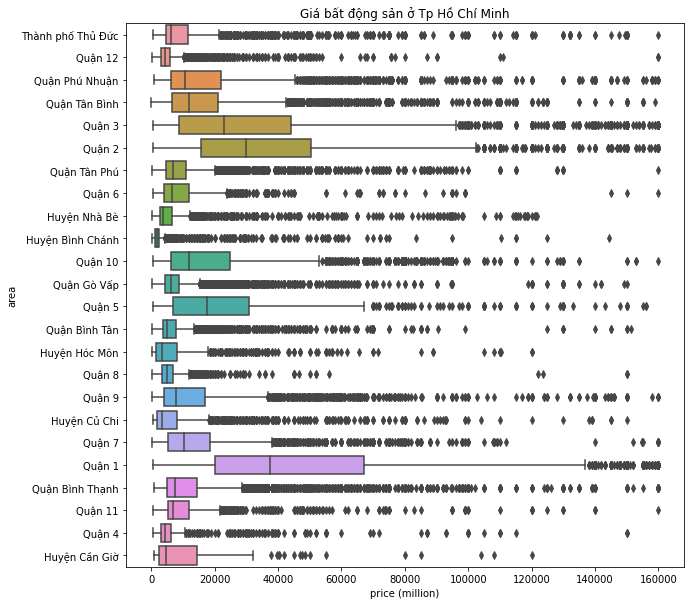

In [72]:
plt.figure(figsize=(10, 10))
# sns.countplot(x='region',data=BDS_df)
BDS_HCM = BDS_df[(BDS_df['price (million)'] <= price_mark)
                 & (BDS_df['region'] == "Hồ Chí Minh")]
plt.title("Giá bất động sản ở Tp Hồ Chí Minh")
sns.boxplot(y='area', x='price (million)', orient='h', data=BDS_HCM)


<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'Giá bất động sản ở Bình Dương')

<AxesSubplot:title={'center':'Giá bất động sản ở Bình Dương'}, xlabel='price (million)', ylabel='area'>

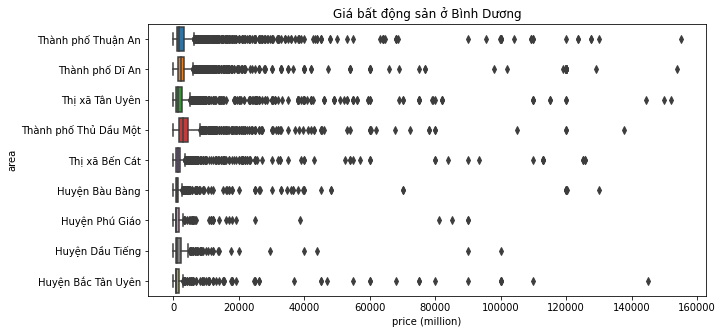

In [73]:
plt.figure(figsize=(10, 5))
# sns.countplot(x='region',data=BDS_df)
BDS_BD = BDS_df[(BDS_df['price (million)'] <= price_mark)
                & (BDS_df['region'] == "Bình Dương")]
plt.title("Giá bất động sản ở Bình Dương")
sns.boxplot(y='area', x='price (million)', orient='h', data=BDS_BD)


<Figure size 720x720 with 0 Axes>

Text(0.5, 1.0, 'Giá bất động sản ở Đồng Nai')

<AxesSubplot:title={'center':'Giá bất động sản ở Đồng Nai'}, xlabel='price (million)', ylabel='area'>

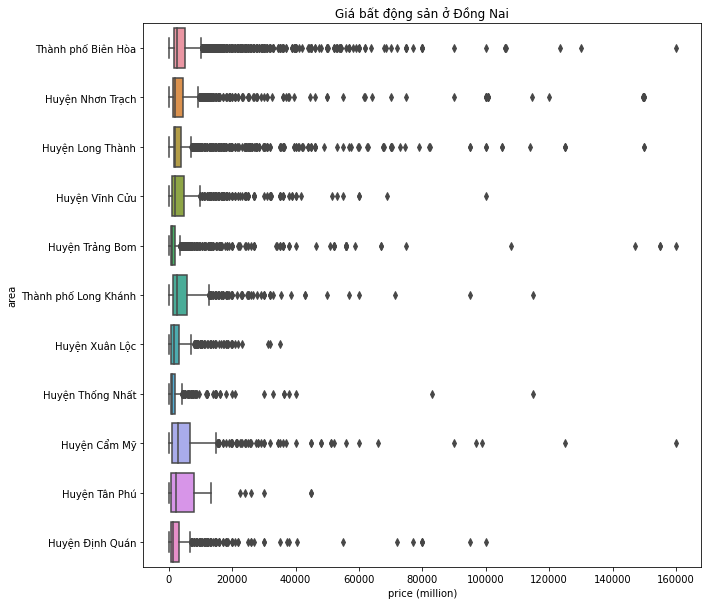

In [74]:
plt.figure(figsize=(10, 10))
# sns.countplot(x='region',data=BDS_df)
BDS_DN = BDS_df[(BDS_df['price (million)'] <= price_mark)
                & (BDS_df['region'] == "Đồng Nai")]
plt.title("Giá bất động sản ở Đồng Nai")
sns.boxplot(y='area', x='price (million)', orient='h', data=BDS_DN)


### Property legal document


In [75]:
property_doc = ['property_legal_document', 'website']
BDS_df[property_doc].groupby(
    property_doc[0]).count().sort_values(by=['website'])


,website
property_legal_document,
Giấy phép KD,22
Giấy phép XD,154
Giấy tờ hợp lệ,4122
Giấy tờ khác,4642
Đang chờ sổ,5943
Đã có sổ,71462
Sổ hồng/ Sổ đỏ,88978


<Figure size 1440x576 with 0 Axes>

<AxesSubplot:xlabel='property_legal_document', ylabel='price (million)'>

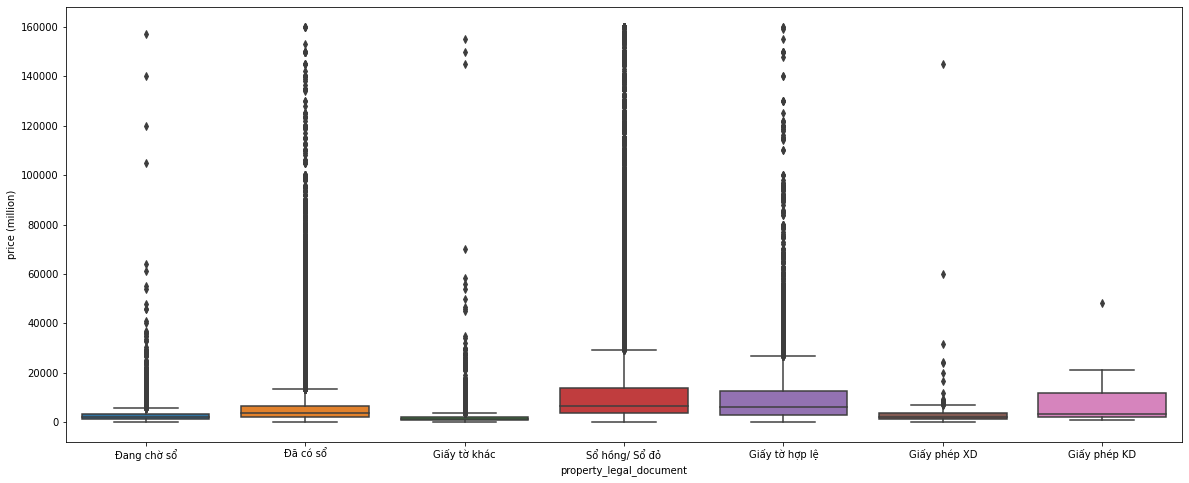

In [76]:
plt.figure(figsize=(20, 8))
sns.boxplot(x='property_legal_document', y='price (million)',
            data=BDS_df[BDS_df['price (million)'] <= price_mark])


In [77]:
BDS_df['property_legal_document'].replace({"Sổ hồng/ Sổ đỏ": 'Đã có sổ',
                                           "Giấy tờ hợp lệ": "Giấy tờ khác",
                                           "Giấy phép XD": "Giấy tờ khác",
                                           "Giấy phép KD": "Giấy tờ khác"}, inplace=True)


### floors


In [78]:
BDS_df['floors'].unique()


array(['Nhiều hơn 10', '1', '3', '2', '4', '5', '6', '7', '10', '9', '8',
       nan, 2.0, 1.0, 18.0, 23.0, 4.0, 6.0, 3.0, 26.0, 35.0, 10.0, 30.0,
       15.0, 12.0, 8.0, 40.0, 38.0, 5.0, 29.0, 19.0, 31.0, 22.0, 25.0,
       9.0, 33.0, 17.0, 20.0, 13.0, 24.0, 11.0, 14.0, 27.0, 16.0, 28.0,
       21.0, 36.0, 7.0, 32.0, 34.0, 37.0, 151.0, 50.0, 61.0, 39.0, 48.0,
       42.0, 44.0, 222.0, 75.0, 2000.0, 68.0, 988.0, 333.0, 163.0, 45.0,
       144.0, 43.0, 91.0, 46.0, 55.0, 52.0], dtype=object)

In [79]:
BDS_df['floors'] = BDS_df['floors'].apply(
    DPP.convertNum2Int, convert_dtype=False)


### floor number


In [80]:
BDS_df['floornumber'].unique()


array([ nan,  16.,   7.,   4.,  12.,   1.,  14.,  18.,  11.,  10.,   9.,
         3.,  29.,   2.,  15.,  22.,  21.,   8.,  19.,   6.,  20.,  35.,
        23.,  27.,  28.,   5.,  25.,  24.,  34.,  13.,  30.,  17.,  26.,
        40.,  37.,  36.,  32.,  33.,  38.,  47.,  39.,  31.,  41.,  45.,
       456.,  48., 320., 132.,  44.])

In [81]:
BDS_df['floornumber'] = BDS_df['floornumber'].apply(
    DPP.convertNum2Int, convert_dtype=False)


### list time


In [82]:
BDS_df['list_time'] = pd.to_datetime(BDS_df['list_time'], format="%d/%m/%Y")


In [83]:
BDS_df['list_time'].sample(5)


128969   2021-11-01
199418   2021-11-07
165882   2021-11-06
112608   2021-10-06
206177   2021-11-07
Name: list_time, dtype: datetime64[ns]

### furnishing_sell


In [84]:
BDS_df["furnishing_sell"].unique()


array([nan, 'Nội thất đầy đủ', 'Hoàn thiện cơ bản', 'Bàn giao thô',
       'Nội thất cao cấp'], dtype=object)

In [85]:
BDS_df['type_real_estate'].unique()


array(['Chung cư', 'Căn hộ dịch vụ', 'Duplex', 'Penthouse', 'Nhà mặt phố',
       'Nhà ngõ', 'Nhà phố liền kề', 'Nhà biệt thự', 'Đất thổ cư',
       'Đất nông nghiệp', 'Đất công nghiệp', 'Đất nền dự án', 'Tập thể',
       'Officetel', nan, 'Nhà mặt tiền', 'Nhà trong hẻm',
       'Đất thổ cư, đất ở', 'Căn hộ chung cư',
       'Đất nền, liền kề, đất dự án', 'Biệt thự, nhà liền kề',
       'Nhà hàng, khách sạn', 'Phòng trọ, nhà trọ', 'Kho, xưởng',
       'Đất nông, lâm nghiệp', 'Shop, kiot, quán', 'Mặt bằng',
       'Văn phòng', 'Trang trại', 'Các loại khác'], dtype=object)

<Figure size 1440x720 with 0 Axes>

<AxesSubplot:xlabel='price (million)', ylabel='type_real_estate'>

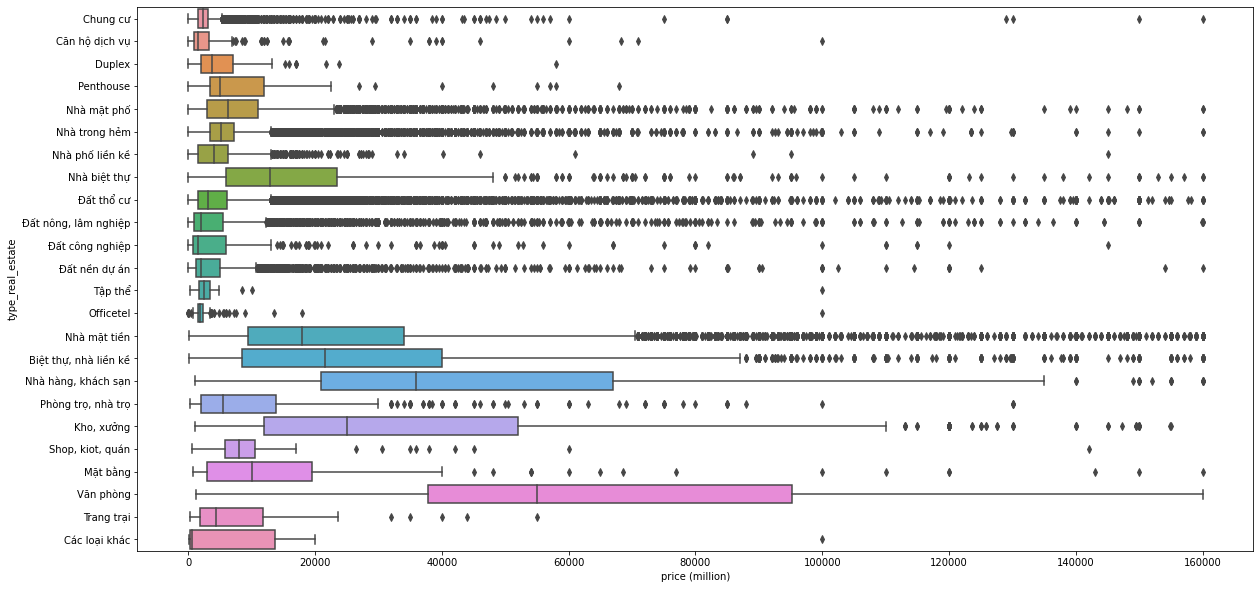

In [89]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=BDS_df[BDS_df['price (million)'] <= price_mark],
            x="price (million)", y="type_real_estate", orient='h')


In [90]:
real_estate = {"Căn hộ chung cư": "Chung cư",
               "Đất thổ cư, đất ở": "Đất thổ cư",
               "Nhà ngõ": 'Nhà trong hẻm',
               'Đất nền, liền kề, đất dự án': 'Đất nền dự án',
               'Đất nông nghiệp': 'Đất nông, lâm nghiệp'

               }

same_type = ['Nhà mặt phố', 'Nhà phố liền kề', 'Nhà biệt thự',
             'Nhà mặt tiền', 'Biệt thự, nhà liền kề', 'Các loại khác']


In [96]:
BDS_df_1 = BDS_df[BDS_df['price (million)'] <= price_mark]
BDS_df_1 = BDS_df_1[BDS_df_1['type_real_estate'].isin(same_type)]


<Figure size 1440x720 with 0 Axes>

<AxesSubplot:xlabel='price (million)', ylabel='type_real_estate'>

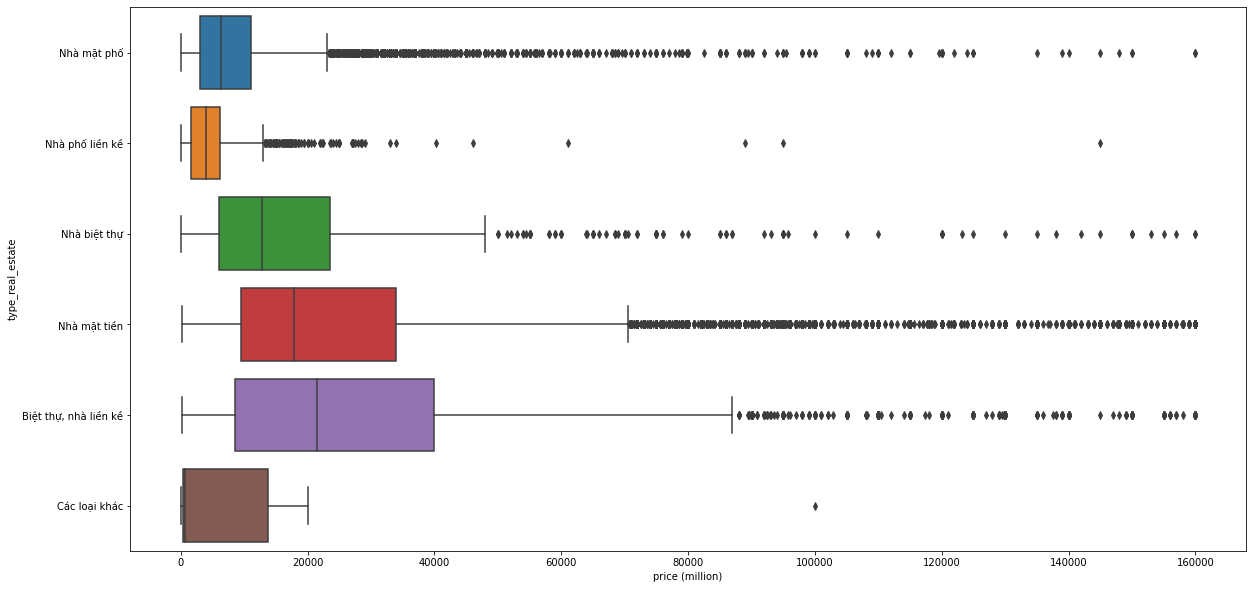

In [97]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=BDS_df_1, x="price (million)",
            y="type_real_estate", orient='h')


In [88]:
BDS_df["type_real_estate"].replace(real_estate, inplace=True)


## 3.1 Overview


In [ ]:
BDS_df.loc[BDS_df['price (million)'] == max(BDS_df['price (million)']), :]


In [ ]:
BDS_df.info()


In [ ]:
BDS_df.describe(include='all')


In [ ]:
BDS_df.to_csv('BDS.csv')


## 3.2 Numeric variables


### Price


In [ ]:
BDS_df['price (million)'].describe().to_frame()


In [ ]:
BDS_df.loc[BDS_df['price (million)'] == max(BDS_df['price (million)']), :]


In [ ]:
plt.figure(figsize=(20, 10))
plt.title("Sự phân bố giá bất động sản")
sns.histplot(data=BDS_df[BDS_df['price (million)']
             <= price_mark], x="price (million)")


=> Giá bất động sản phân bổ chủ yếu trong khoảng dưới 11 tỷ đồng


In [ ]:
group_price = ['Giá rẻ', 'Tầm trung', 'Cao cấp', 'Siêu cao cấp']
# Giá rẻ :0 - 2 tỷ
# Tầm trung: 2 - 5 tỷ
# Cao cấp: 5 - 20 tỷ
# Siêu cao cấp: trên 20 tỷ
bins_price = [0, 2000, 5000, 20000, max(BDS_df['price (million)'])]
BDS_df['price-binned'] = pd.cut(BDS_df['price (million)'],
                                bins=bins_price, labels=group_price)


In [ ]:
BDS_df['price-binned'].value_counts()


In [ ]:
plt.figure(figsize=(20, 8))
plt.title("Số lượng giá bất động sản theo phân khúc sản phẩm")
sns.countplot(x='price-binned', data=BDS_df)


=> Phân khúc giá BĐS tập trung chủ yếu là các BĐS tầm trung và cao cấp


### list time


In [ ]:
BDS_df['year'] = BDS_df['list_time'].dt.year
BDS_df['month'] = BDS_df['list_time'].dt.month


<Figure size 3600x1440 with 0 Axes>

<AxesSubplot:xlabel='list_time', ylabel='price (million)'>

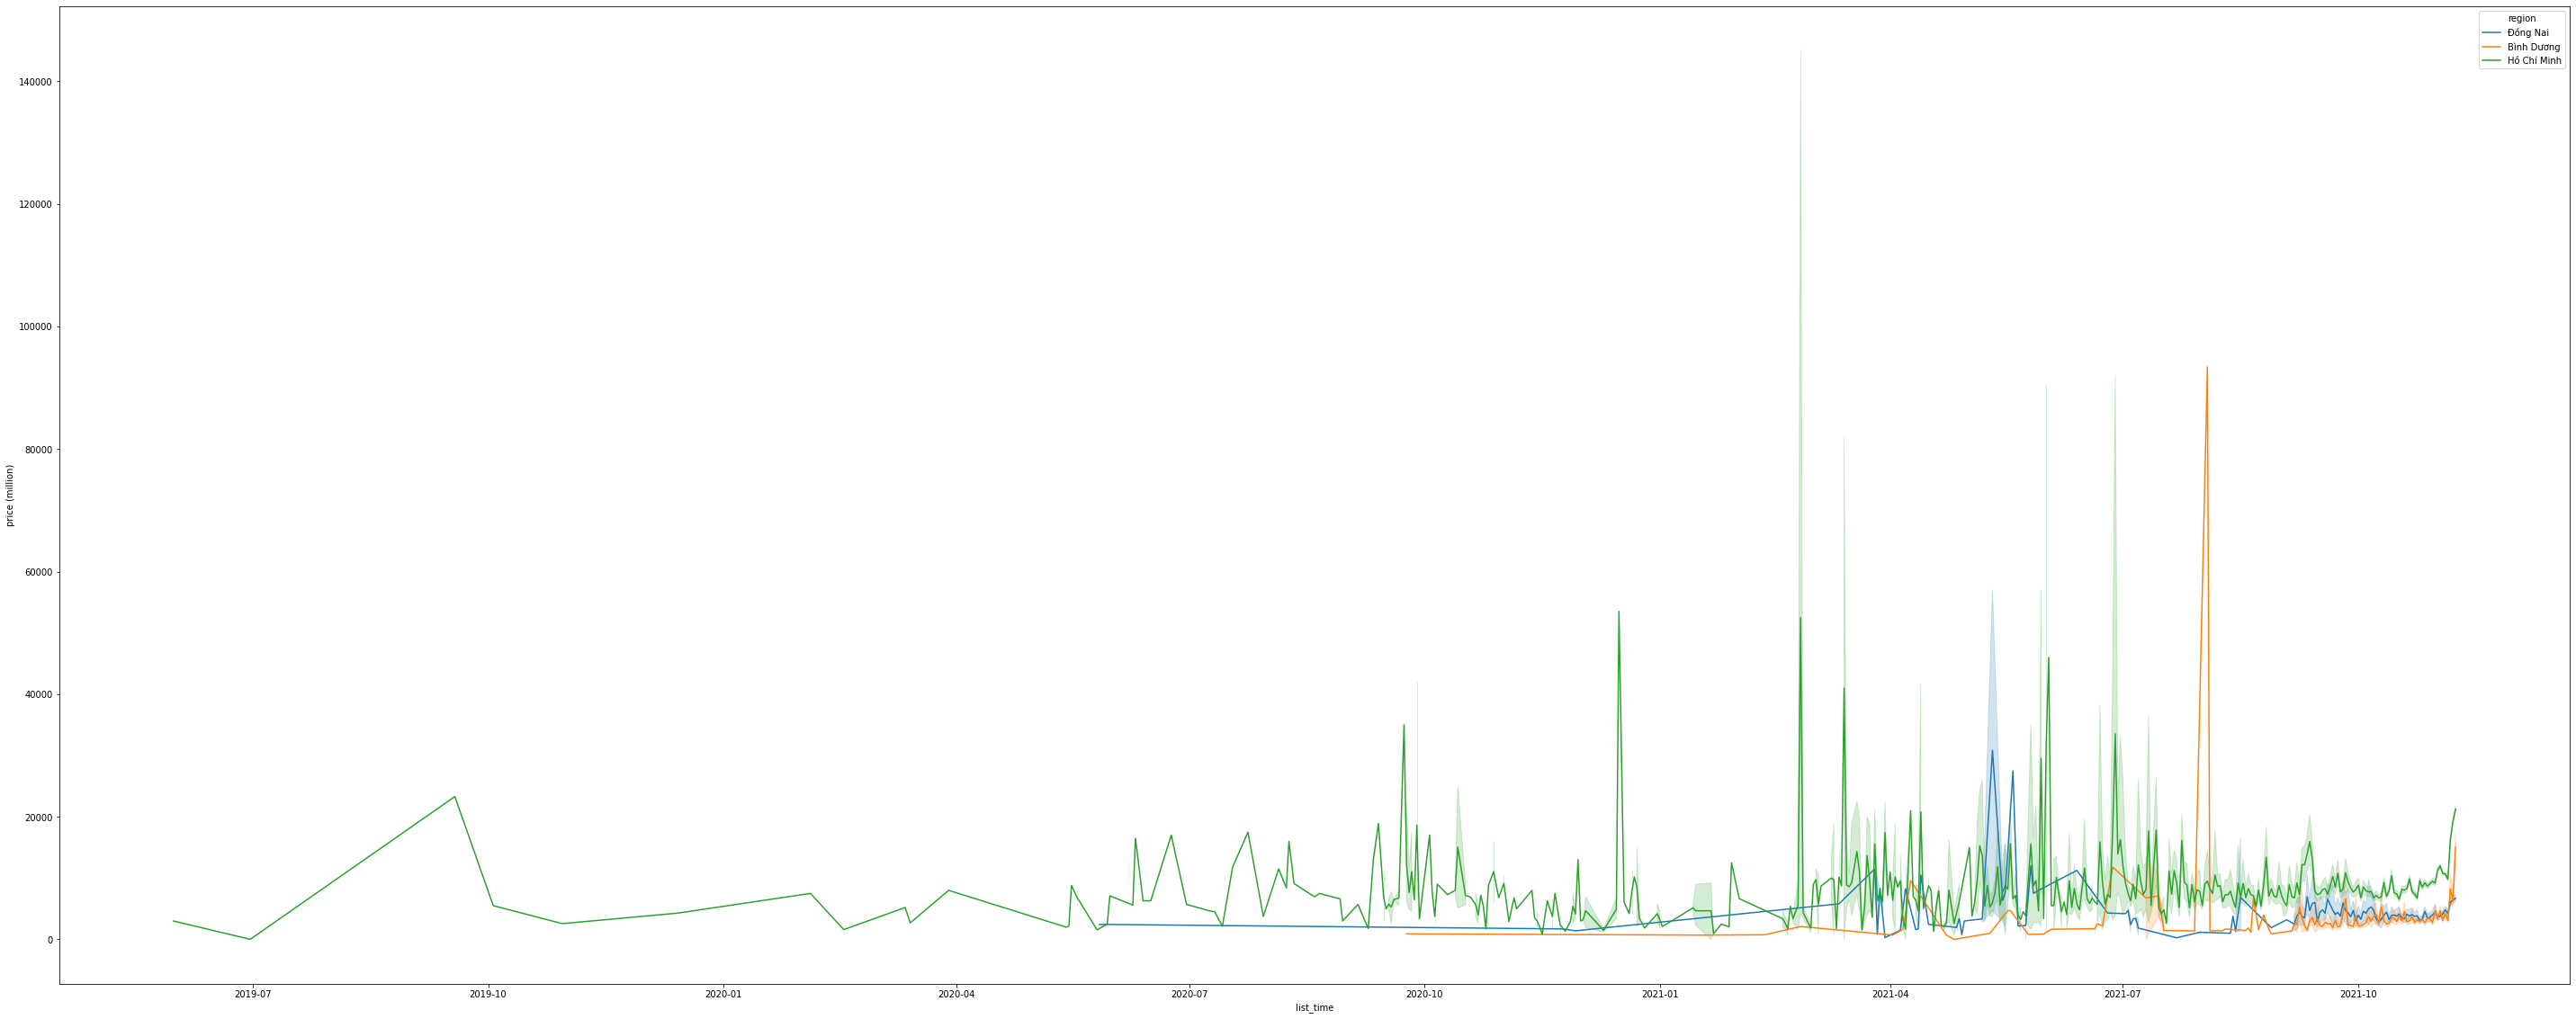

In [ ]:
plt.figure(figsize=(50, 20))
sns.lineplot(data=BDS_df[BDS_df['price (million)'] <= price_mark], x="list_time",
             y="price (million)", hue="region", dashes=False)


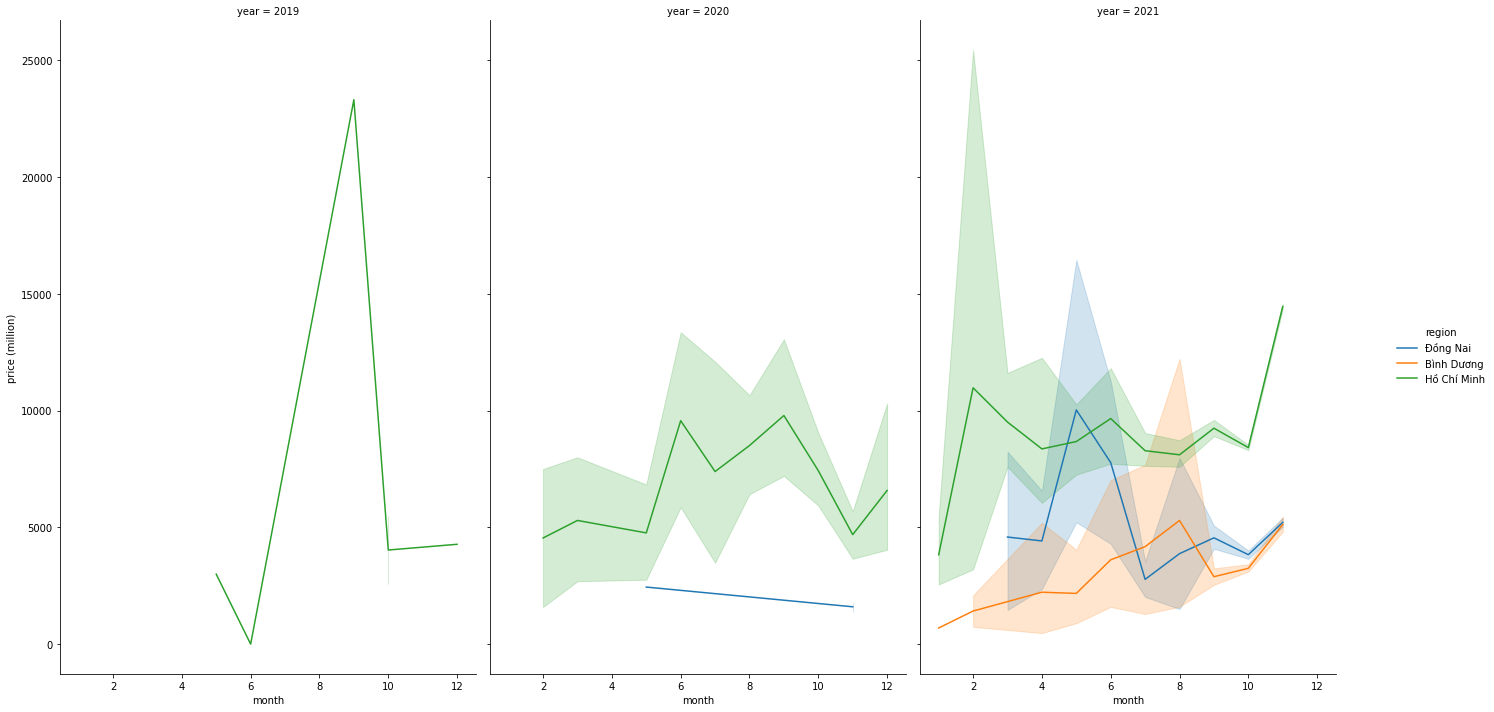

In [ ]:
grid = sns.FacetGrid(BDS_df[BDS_df['price (million)']
                     <= price_mark], hue="region", col="year", margin_titles=True, height=10, aspect=0.65)
grid.map(sns.lineplot, "month", "price (million)")
grid.add_legend()


## 3.3 Categorical variables


### Website


In [ ]:
BDS_df['website'].unique()


In [ ]:
plt.figure(figsize=(20, 8))
plt.title("Phân khúc giá bất động sản trên website")
sns.countplot(x='website', hue='price-binned',
              data=BDS_df)


<div> => Chotot tập trung chủ yếu các BĐS giá rẻ, tầm trung và cao cấp. Các BĐS siêu cao cấp chỉ chiếm thị phần nhỏ </div>
<div> => alonhadat chủ yếu được đăng bán các sản phẩm cao cấp </div>


### Region


In [ ]:
BDS_df['region'].unique()


In [ ]:
BDS_df['region'].replace({'Tp Hồ Chí Minh': 'Hồ Chí Minh'}, inplace=True)


In [ ]:
BDS_df[BDS_df['price (million)'] == max(BDS_df['price (million)'])]


=> Vì chỉ có 1 outlier làm giảm khả năng quan sát giá đất trên Đồng Nai, Bình Dương, Hồ Chí Minh nên cần làm xếp riêng trường hợp này để dễ quan sát


In [ ]:
plt.figure(figsize=(15, 10))
# sns.countplot(x='region',data=BDS_df)
sns.boxplot(x='region', y='price (million)',
            data=BDS_df[BDS_df['price (million)'] <= price_mark])


=> Ta nhận thấy rằng các BĐS ở khu vực Tp Hồ Chí Minh có sự đa dạng về phân khúc hơn so với Bình Dương, Đồng Nai.


In [ ]:
plt.figure(figsize=(20, 8))
sns.boxplot(x='property_legal_document', y='price (million)',
            data=BDS_df[BDS_df['price (million)'] <= price_mark])


In [ ]:
for col in BDS_df.columns:
    if BDS_df[col].dtypes == 'object' and col not in ['list_time', 'ward']:
        if col in ['area', 'type_real_estate', 'rooms', 'floors', 'floornumber']:
            plt.figure(figsize=(25, 8))
        else:
            plt.figure(figsize=(10, 6))
        ax = sns.boxplot(x=col, y='price (million)',
                         data=BDS_df[BDS_df['price (million)'] < 50000])
        plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
        plt.xticks(rotation=45)
